# An analysis of video Game Metrics from 2004 to 2010
### Ted Yarmoski, March 2023

## Research Question 
<u>What are the most important empirical considerations for those in the video game industry when planning a new video game release?</u>

---

# Introduction



## Description
This data contains the sales and playtime of 1000+ video games released between 2004 and 2010.

https://corgis-edu.github.io/corgis/python/video_games/

## Motivation
I have always been interested in video games and I would like to investigate whether there is a correlation between various playtime metrics (avg, min lengths to beat, etc.) and sales numbers for those video games.

---

# Methods

This data contains the sales and playtime of 1000+ video games released between 2004 and 2010. This data is being used non-commericially for my CS140 course at UCLA. The playtime information was collected from crowd-sourced data on “How Long to Beat”.

The data is organized as a table with each row representing a game. Each column contains a metric relating to that game including its length, sales, review score, genre, etc. The dataset was already organized as described, so further organization was unnecessary. For my analysis, I attempted to think as if I was a business analyst at a video game company trying to use empirical data to create goals or guidelines for the company's next successful video game release.  

---
# Results

## Data Exploration


In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

def get_dataset_df(dataset_name):
    dataset_name = dataset_name.lower()
    dataset_name = dataset_name.replace(" ", "_")
    site_name = f"https://corgis-edu.github.io/corgis/csv/{dataset_name}"

    response = requests.get(site_name)
    soup = BeautifulSoup(response.content, "html.parser")

    #csv_link = [link["href"] for link in soup.find_all("a") if link.has_attr('download')][0]
    csv_link = f"datasets/csv/video_games/{dataset_name}.csv"
    csv_link = f"https://corgis-edu.github.io/corgis/{csv_link}"
    df = pd.read_csv(csv_link)

    return df

In [2]:
df = get_dataset_df("Video Games")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Title                          1212 non-null   object 
 1   Features.Handheld?             1212 non-null   bool   
 2   Features.Max Players           1212 non-null   int64  
 3   Features.Multiplatform?        1212 non-null   bool   
 4   Features.Online?               1212 non-null   bool   
 5   Metadata.Genres                1212 non-null   object 
 6   Metadata.Licensed?             1212 non-null   bool   
 7   Metadata.Publishers            948 non-null    object 
 8   Metadata.Sequel?               1212 non-null   bool   
 9   Metrics.Review Score           1212 non-null   int64  
 10  Metrics.Sales                  1212 non-null   float64
 11  Metrics.Used Price             1212 non-null   float64
 12  Release.Console                1212 non-null   o

In [3]:
df.describe()

,Features.Max Players,Metrics.Review Score,Metrics.Sales,Metrics.Used Price,Release.Year,Length.All PlayStyles.Average,Length.All PlayStyles.Leisure,Length.All PlayStyles.Median,Length.All PlayStyles.Polled,Length.All PlayStyles.Rushed,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
count,1212.000000,1212.000000,1212.00000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,...,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,1.658416,68.828383,0.50316,17.393894,2006.820132,13.653177,26.250426,11.225371,44.415842,9.396163,...,12.731491,18.866048,12.103548,13.995875,10.319788,8.465952,11.051966,8.280941,24.882838,6.974697
std,1.204377,12.956266,1.06985,5.018972,1.050653,19.397156,51.598941,13.493717,154.837893,11.176371,...,23.979610,42.917021,23.355374,57.333257,20.895117,9.691745,14.092617,9.502600,87.382770,7.964522
min,1.000000,19.000000,0.01000,4.950000,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,60.000000,0.09000,14.950000,2006.000000,3.562500,4.000000,3.025000,1.000000,2.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,70.000000,0.21000,17.950000,2007.000000,8.858333,12.000000,8.000000,6.000000,6.708333,...,7.291667,8.000000,7.000000,1.000000,6.283333,6.575000,8.000000,6.041667,3.000000,5.341667
75%,2.000000,79.000000,0.46000,17.950000,2008.000000,16.033333,27.600000,13.783333,25.000000,11.366667,...,16.112500,21.033333,15.000000,7.000000,12.941667,11.033333,14.508333,10.533333,14.000000,9.312500
max,8.000000,98.000000,14.66000,49.950000,2008.000000,279.733333,476.266667,126.000000,2300.000000,120.200000,...,291.000000,478.933333,291.000000,1100.000000,291.000000,72.383333,135.583333,70.000000,1100.000000,70.000000


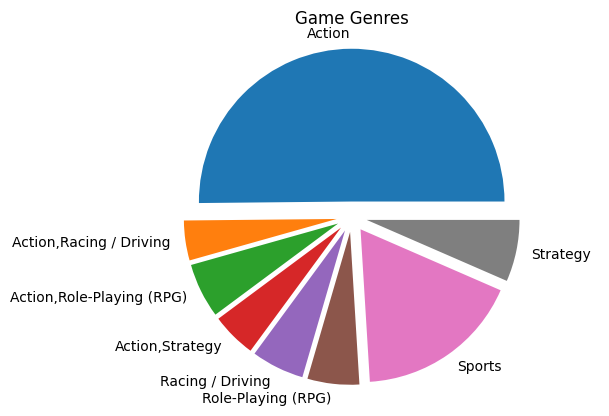

In [4]:
genre_count = df.groupby('Metadata.Genres').size()
genre_count = genre_count[genre_count >= 40]
#genre_count = df['Metadata.Genres'].value_counts()
plt.pie(genre_count, labels=genre_count.index, explode=[0.1]*len(genre_count))
plt.title('Game Genres')
plt.axis('equal')
plt.show()


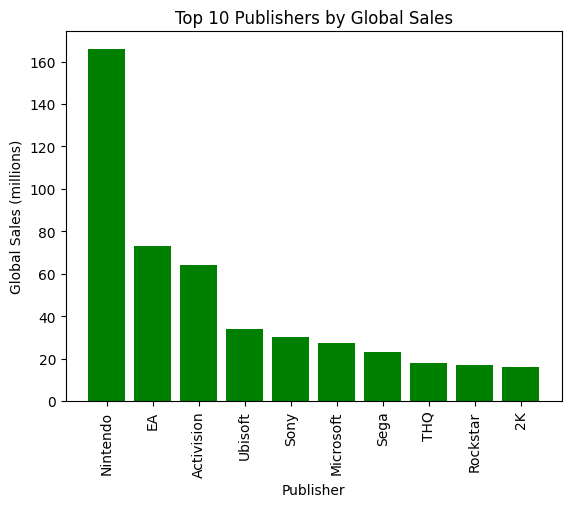

In [5]:
# Group the data by publisher and sum the global sales
publisher_sales = df.groupby('Metadata.Publishers')['Metrics.Sales'].sum().sort_values(ascending=False)
top_publishers = publisher_sales[:10]
plt.bar(top_publishers.index, top_publishers, color="green")
plt.xticks(rotation=90)
plt.title('Top 10 Publishers by Global Sales')
plt.xlabel('Publisher')
plt.ylabel('Global Sales (millions)')
plt.show()


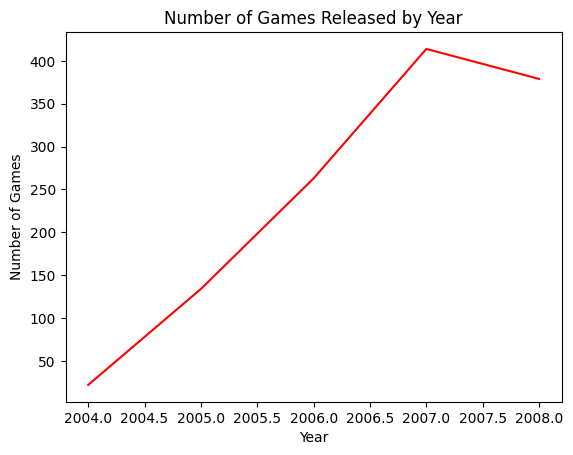

In [6]:
year_count = df.groupby('Release.Year')['Title'].count()
plt.plot(year_count.index, year_count, color="red")
plt.title('Number of Games Released by Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.show()


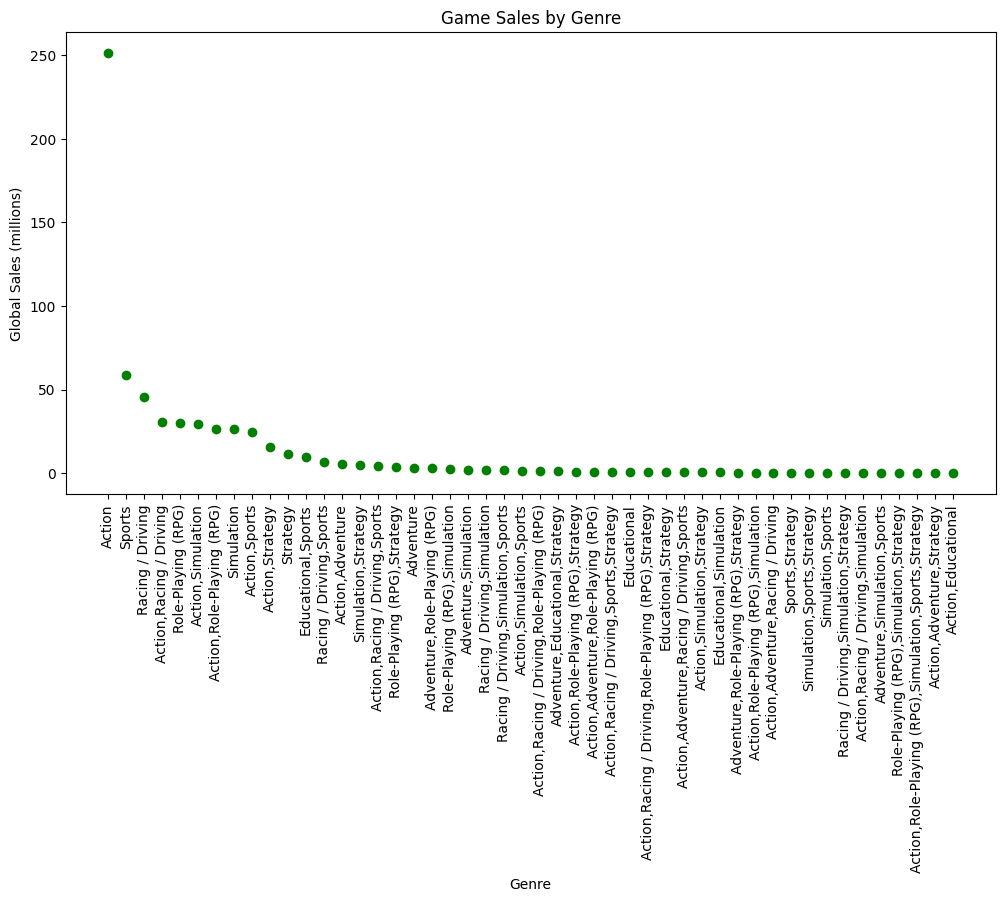

In [7]:
# Group the data by genre and sum the sales
genre_sales = df.groupby('Metadata.Genres')['Metrics.Sales'].sum().sort_values(ascending=False)

# Create a scatter plot of game sales by genre
plt.figure(figsize=(12,6))
plt.scatter(genre_sales.index, genre_sales, color="green")
plt.xticks(rotation=90)
plt.title('Game Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales (millions)')
plt.show()


From my exploratory data analysis, there does not seem to be any further cleaning, merging, or further processing of the data since my selected dataset has been already tailored and organized.

## Analysis


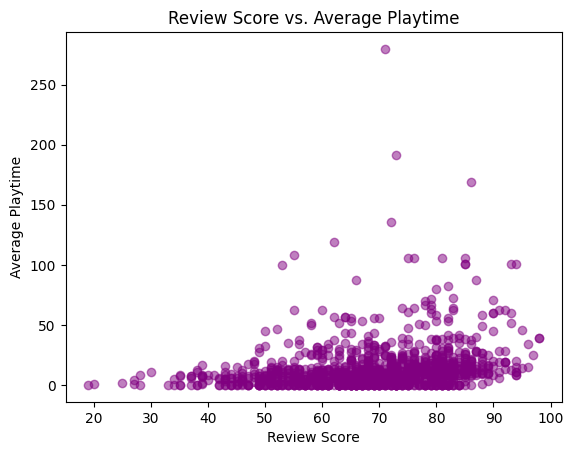

In [8]:
plt.scatter(df['Metrics.Review Score'], df['Length.All PlayStyles.Average'], alpha=0.5, color="purple")
plt.title('Review Score vs. Average Playtime')
plt.xlabel('Review Score')
plt.ylabel('Average Playtime')
plt.show()

From the chart above, we can see that there is slight correlation between critic review score and average time to complete the game.

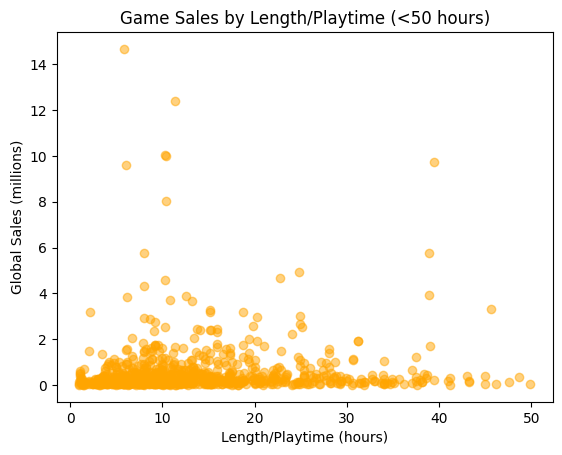

In [9]:
filtered_df = df[(df['Length.All PlayStyles.Average'] >= 1) & (df['Length.All PlayStyles.Average'] <= 50)]

plt.scatter(filtered_df['Length.All PlayStyles.Average'], filtered_df['Metrics.Sales'], alpha=0.5, color="orange")
plt.title('Game Sales by Length/Playtime (<50 hours)')
plt.xlabel('Length/Playtime (hours)')
plt.ylabel('Global Sales (millions)')
plt.show()

This chart shows that there is no strong correlation between game sales and average playtime. This may indicate that simply having a longer game does not equate to a stronger game (quantity not necessarily better than quality).

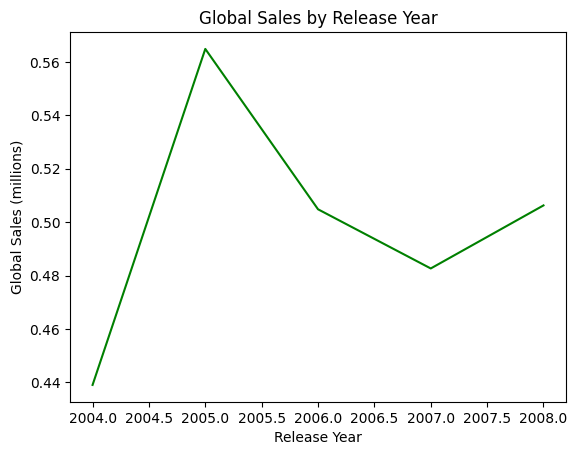

In [10]:
# Group the data by release year and sum the sales
year_sales = df.groupby('Release.Year')['Metrics.Sales'].mean()

# Create a line plot of global sales by release year
plt.plot(year_sales.index, year_sales, color="green")
plt.title('Global Sales by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Global Sales (millions)')
plt.show()


While the chart may indicate a large dip in sales around 2007, by examining the y-axis we can see that there has not been a huge shift in sales numbers over the years.

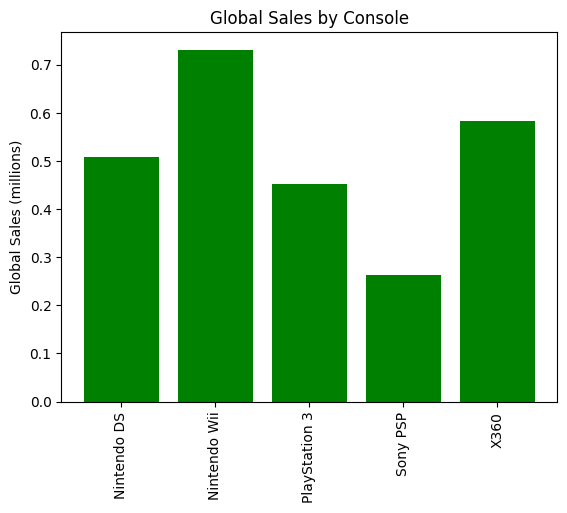

In [11]:
sales_by_console = df.groupby('Release.Console')['Metrics.Sales'].mean()

# Create a bar chart of global sales by console
plt.bar(sales_by_console.index, sales_by_console, color="green")
plt.xticks(rotation=90)
plt.ylabel('Global Sales (millions)')
plt.title('Global Sales by Console')
plt.show()

This chart shows, using the mean sales on each console platform, that to some extent, the console that the game runs on contributes to how many sales that game gets. This chart makes sense since the Nintendo Wii was extremely popular and thus games on it tended to sell more copies because more people had access to the hardware.

---
# Discussion

My analysis reveals several correlations that may be useful for video game developers or businesses to keep in mind when planning a future release.

We found that a higher playtime or length of the video game to complete has positive correlation with review scores. Intuitively, higher review scores result in better public perception and sales, so creating more content for a game may result in more success. However, further analysis indicated that sales are not necessarily correlated with playtime meaning hgiher review scores may not equate to more sales. This is backed up by other sources, such as a ARS Technica articles examining steam review scores and seeking correlation with copies sold.<sup id="a1">[1](#f1)</sup>

As a developer or company, you may need to assess your priorities. If you have not established a loyal customerbase, you may want to still prioritize playtime since higher review scores may lead to more publicity or a better track record for the long term. This may lead to the development of a customerbase that would be interested in future releases resulting in more revenue in the long term. However, as a large company or a organization with an established customer-base, expending extra resources into playtime/length may not be cost efficient in terms of pure sales numbers. If review scores are not as pertinent in this case, then it may be better to rush a game to market without investing extra time and funding into creating a longer experience.

Another area to consider is which platform to release a game onto. From my analysis, there are financial benefits to releasing your game onto a popular platform, such as the Wii while it was at its peak popularity. However, there are additional factors to consider. Developing for certain platforms may introduce additional costs or limitations such as using specific developer kits or programming languages, following company guidelines or restrictions such as Nintendo policies when developing for the Wii, or technical bugs related to porting from other platforms <sup id="a2">[2](#f2)</sup>. This can introduce overhead or additional time needed to release a title, especially if developing on multiple distinct platforms. A decision needs to be made near the beginning of development to choose which platforms will be supported for the final product.

While my project has explored a selection of video game metrics, there are many other options available in assessing a game's performance and its characteristics for use in predicting the performance of future games. In an article from Knowledge at Wharton, the staff talks about Wharton students using data analysis techniques to predict the viability of various games published by EA.<sup id="a3">[3](#f3)</sup> In recommending new games to EA play subscribers, a group of Wharton students decided on the following factors: "Popularity: wanting to play “the hottest game on the street”; Social: wanting to play games that one’s friends and social circles play; Content: wanting to play games of a similar genre to those you played before; and Favorability: wanting to play games that have received good ratings and reviews." What we can gather from all of the analysis is that it is far from simply creating a fun game that leads to the success of that game.





<span id="f1">[1]</span> Ars Technica. (2014, April 15). Steam Gauge: Do strong reviews lead to stronger sales on Steam? Retrieved from https://arstechnica.com/gaming/2014/04/steam-gauge-do-strong-reviews-lead-to-stronger-sales-on-steam/#:~:text=In%20comparing%20estimates%20of%20sales%20on%20Steam%20to,at%20the%20top%20end%20of%20the%20critical%20spectrum.

<span id="f2">[2]</span> Game Designing. (n.d.). Console vs PC: Which is Better for Gaming? Retrieved from https://www.gamedesigning.org/gaming/console-vs-pc/

<span id="f3">[3]</span> Knowledge@Wharton. (2019, May 23). Telling the Data Story Behind Video Gaming. Retrieved from https://knowledge.wharton.upenn.edu/article/telling-data-story-behind-video-gaming/